# Project: Interesting movie facts

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

This dataset contains information from 10k movies in the well-known website "IMDb". Information that may be found in this dataset are: popularity, genres, revenue, budget, release year...

**Questions**: From this dataset, the most important question that comes to probably everyone's mind are:

*   What is the most popular genre during all this time? And, of course, what is the most popular genre by decade?
*   Are more movies being made nowadays?
*   What is the average vote rate?
*   What is the movie with the highest budget? And the one with the most revenue?
*   What is the most profitable movie? And the least?
*   Are most of the movies profitable?
*   Are modern movies more profitable than old movies?
*   Are modern movies "better" than old movies?
*   How does rates relate to profit? And revenue? Will better rated movies be more profitable?

All of these questions will be answered in the following project.
    

In [96]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>

## Data Wrangling

### General Properties

We will name our dataframe "df" and get a general overview of how it looks like

In [124]:
# Set file directory for reproduction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'

# Read CSV file and print structure
df = pd.read_csv(url)

In [125]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After getting a general overview, it is also great to know with the type of data we are working:

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As we can see, we are mostly working with strings. From this preliminary analysis, and for the purpose of this project, the most important columns are "popularity", "original_title", "genres", "budget_adj" and "revenue_adj". We will use the last two to remove the effects of inflation and being able to compare the data properly.

We also have some values that we will have to correct in the following section.

We can also run a histogram of the whole dataset to see if we can get any insights.

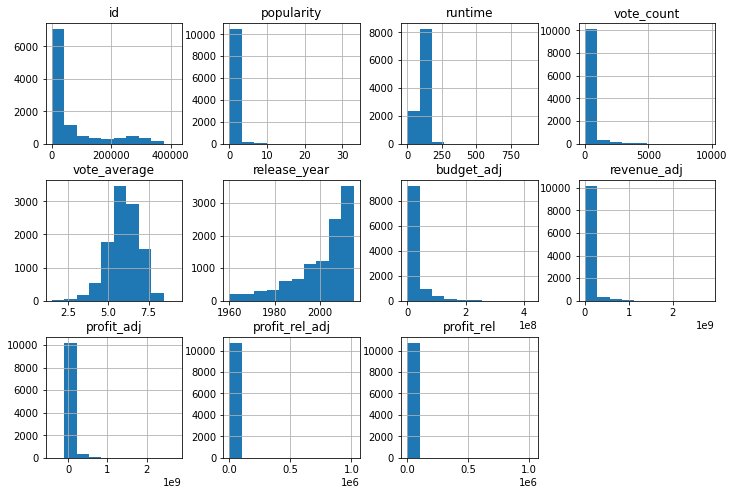

In [387]:
df.hist(figsize = (12,8), layout=(3,4))

plt.show()

The most valuable insights we can get from the graphic analysis are:

*   A lot of movies has been done in the last 20 years.
*   The average vote results is around 6.

All the other histograms do not provide enough information to draw a conclusion.

### Data Cleaning

As we can see, we have a few missing values from some colums:

In [129]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

I am going to drop all the missing columns from fields "imdb_id", "cast", "director", "overview", "genres" because they are a few. They probably will not make any difference when analyzing the whole set of data so I would rather delete them than having them with a general observation like "unknown". If they were ints or floats, I could replace the values with the mean of the whole column but they are strings.

In [130]:
df.dropna(subset = ["imdb_id", "cast", "director", "overview", "genres"], inplace = True)

There are a few fields we can drop as they do not give any important information about the analysis I am going to dot. This fields are "homepage", "tagline", "keywords" and "production_companies". Fields like "budget" and "revenue" are also not important as we will use the adjustedt ones.

In [131]:
df.drop(["homepage", "tagline", "keywords", "production_companies", "budget", "revenue", "overview"], axis = 1, inplace =True)

After performing some actions to clean the dataset, all null values have been removed:

In [132]:
df.isnull().sum()

id                0
imdb_id           0
popularity        0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [133]:
df.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### What is the most popular genre?

The easiest way to achieve this is by performing a describe on the "genres" column.

In [135]:
df["genres"].describe()

count     10725
unique     2020
top       Drama
freq        710
Name: genres, dtype: object

As we can see, the most popular genre by this method is Drama. It is important to notice that a lot of movies are a mix of different genres so, we can only say that that the most popular pure genre is Drama. We can group the movies with only one genre associated in this "pure genre" definition.

### What is the most popular genre by decade?

In order to answer this question, we have to group the data in decades:

In [136]:
d1960 = df[(df["release_year"] >= 1960) & (df["release_year"] < 1970)]
d1970 = df[(df["release_year"] >= 1970) & (df["release_year"] < 1980)]
d1980 = df[(df["release_year"] >= 1980) & (df["release_year"] < 1990)]
d1990 = df[(df["release_year"] >= 1990) & (df["release_year"] < 2000)]
d2000 = df[(df["release_year"] >= 2000) & (df["release_year"] < 2010)]
d2010 = df[(df["release_year"] >= 2010) & (df["release_year"] < 2020)]

As we can see in the following data, the most popular genre for the decades are:
<ul>
    <li>60's: Drama</li>
    <li>70's: Drama</li>
    <li>80's: Comedy</li>
    <li>90's: Comedy</li>
    <li>00's: Comedy</li>
    <li>10's: Drama</li>
</ul>

This data also support the calculation of the most popular genre done in the previous step: Drama.

In [245]:
print('1960')
print(d1960.genres.describe())
print('1970')
print(d1970.genres.describe())
print('1980')
print(d1980.genres.describe())
print('1990')
print(d1990.genres.describe())
print('2000')
print(d2000.genres.describe())
print('2010')
print(d2010.genres.describe())


1960
count       358
unique      196
top       Drama
freq         25
Name: genres, dtype: object
1970
count       505
unique      259
top       Drama
freq         25
Name: genres, dtype: object
1980
count       1054
unique       458
top       Comedy
freq          78
Name: genres, dtype: object
1990
count       1760
unique       641
top       Comedy
freq         103
Name: genres, dtype: object
2000
count       3521
unique       987
top       Comedy
freq         242
Name: genres, dtype: object
2010
count      3527
unique      892
top       Drama
freq        318
Name: genres, dtype: object


### Are more movies being made nowadays?

In order to reply to this question, it is better to plot a a countplot.

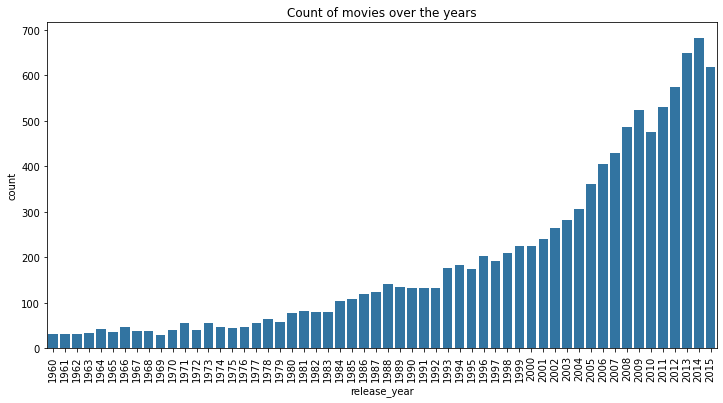

In [388]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(data=df, x='release_year', color='#1f77b4')

plt.title("Count of movies over the years");
plt.xticks(rotation=90)
plt.show()

As we can see, a lot of movies has been made in the last few years. However, it does not imply more movies are being made nowadays. It just means that more recent movies are in the dataset.

### What is the highest budget movie?

By running the following code, we can see the top five movies with the highest budget. The most expensive one is _The Warrior's Way_. However, this is due to a typo in the budget input. In reality, the most expensive movie of all time in history is **Pirates of the Caribbean: On Stranger Tides**

In [146]:
df.sort_values("budget_adj", ascending=False)[['original_title', 'release_date', 'director', 'budget_adj', 'revenue_adj']].head()

,original_title,release_date,director,budget_adj,revenue_adj
2244,The Warrior's Way,12/2/10,Sngmoo Lee,4.250000e+08,1.108757e+07
3375,Pirates of the Caribbean: On Stranger Tides,5/11/11,Rob Marshall,3.683713e+08,9.904175e+08
7387,Pirates of the Caribbean: At World's End,5/19/07,Gore Verbinski,3.155006e+08,1.010654e+09
6570,Superman Returns,6/28/06,Bryan Singer,2.920507e+08,4.230205e+08
5231,Titanic,11/18/97,James Cameron,2.716921e+08,2.506406e+09


### What is the highest grossing movie?

By running the following code, we can see that the movie with the highest revenue is **Avatar** followed by some other well-known movies like _Star Wars_ or _Titanic_.

In [148]:
df.sort_values('revenue_adj', ascending=False)[['original_title', 'release_date', 'director', 'budget_adj', 'revenue_adj']].head()

,original_title,release_date,director,budget_adj,revenue_adj
1386,Avatar,12/10/09,James Cameron,2.408869e+08,2.827124e+09
1329,Star Wars,3/20/77,George Lucas,3.957559e+07,2.789712e+09
5231,Titanic,11/18/97,James Cameron,2.716921e+08,2.506406e+09
10594,The Exorcist,12/26/73,William Friedkin,3.928928e+07,2.167325e+09
9806,Jaws,6/18/75,Steven Spielberg,2.836275e+07,1.907006e+09


### What is the most profitable movie?

In order to calculate this, we have to make a new column. We will calculate it in absolute terms. To do that, we will substrate the budget to the revenue.

In [149]:
df["profit_adj"] = df["revenue_adj"] - df["budget_adj"]

And, as we can see in the following line, the most profitable movie is **Star Wars**.

Another important insight we can find in this clasification is that, three of the five most profitable movies of all time are more than 40 years old. It may had to do with people having less leisure options than now.

In [200]:
df.sort_values('profit_adj', ascending=False)[['original_title', 'release_date', 'director', 'budget_adj', 'revenue_adj', 'profit_adj']].head()

,original_title,release_date,director,budget_adj,revenue_adj,profit_adj
1329,Star Wars,3/20/77,George Lucas,3.957559e+07,2.789712e+09,2.750137e+09
1386,Avatar,12/10/09,James Cameron,2.408869e+08,2.827124e+09,2.586237e+09
5231,Titanic,11/18/97,James Cameron,2.716921e+08,2.506406e+09,2.234714e+09
10594,The Exorcist,12/26/73,William Friedkin,3.928928e+07,2.167325e+09,2.128036e+09
9806,Jaws,6/18/75,Steven Spielberg,2.836275e+07,1.907006e+09,1.878643e+09


But, what about in relative terms? What is the film that got the highest revenue for the budget. We can calculate it by writing a function that calculates the relative profit only if the budget and the revenue is known. In all the other cases, the result will be 0.

In [201]:
df['profit_rel_adj'] = df.apply(lambda x: ((x["revenue_adj"] - x["budget_adj"]) / x["budget_adj"]) if (x['revenue_adj'] > 0) & (x['budget_adj'] > 0) else 0, axis=1)

In the following list, we can see the most profitable movies in history.

In [203]:
df.sort_values('profit_rel_adj', ascending=False)[['original_title', 'release_date', 'director', 'budget_adj', 'revenue_adj', 'profit_adj', 'profit_rel_adj']].head(5)

,original_title,release_date,director,budget_adj,revenue_adj,profit_adj,profit_rel_adj
10495,"The Karate Kid, Part II",6/18/86,John G. Avildsen,224.802924,2.289886e+08,2.289884e+08,1.018618e+06
6179,Into the Night,2/15/85,John Landis,231.096930,1.358201e+07,1.358178e+07,5.877093e+04
3608,From Prada to Nada,1/28/11,Angel Gracia,90.154018,2.423495e+06,2.423405e+06,2.688072e+04
7447,Paranormal Activity,9/14/07,Oren Peli,15775.028739,2.033462e+08,2.033304e+08,1.288939e+04
2449,The Blair Witch Project,7/14/99,Daniel Myrick|Eduardo SÃ¡nchez,32726.321165,3.246451e+08,3.246124e+08,9.919000e+03


Despite the fact that _The Karate Kid, Part II_ appears to be the most profitable movie in historym, it does not seem possible to do a movie with 224 dolars or even 90! So, let's assume you need at least 1,000 dolars to make a movie and redo the list.

In [204]:
df[df['budget_adj'] > 1000].sort_values('profit_rel_adj', ascending=False)[['original_title', 'release_date', 'director', 'budget_adj', 'revenue_adj', 'profit_adj', 'profit_rel_adj']].head(5)

,original_title,release_date,director,budget_adj,revenue_adj,profit_adj,profit_rel_adj
7447,Paranormal Activity,9/14/07,Oren Peli,15775.028739,2.033462e+08,2.033304e+08,12889.386667
2449,The Blair Witch Project,7/14/99,Daniel Myrick|Eduardo SÃ¡nchez,32726.321165,3.246451e+08,3.246124e+08,9919.000000
1354,Eraserhead,3/19/77,David Lynch,35977.810326,2.518447e+07,2.514849e+07,699.000000
7277,Pink Flamingos,3/12/72,John Waters,62574.731176,3.128737e+07,3.122479e+07,499.000000
7178,Super Size Me,1/17/04,Morgan Spurlock,75038.950988,3.298837e+07,3.291333e+07,438.616585


As we can see in the previous list, the most profitable movie of all times is **Paranormal Activity**, a horror movie from 2007 that grossed more than 200,000,000 dolars adjusted to 2011. The movie only costed 15,000 dolars so this makes a profit of more than 10000 times the cost!

The second most profitable movie in history is _The Blair Witch Project_ and the third is _Eraserhead_. Both of them are horror movies. Looks like horror is profitable!

### What is the worst movie in economic terms?

Again, we can calculate it in relative or absolute terms. However, it is more interesting what is the movie that lost the more money.

In [206]:
df[df['revenue_adj'] > 0].sort_values('profit_adj', ascending=True)[['original_title', 'release_date', 'director', 'budget_adj', 'revenue_adj', 'profit_adj']].head()

,original_title,release_date,director,budget_adj,revenue_adj,profit_adj
2244,The Warrior's Way,12/2/10,Sngmoo Lee,4.250000e+08,1.108757e+07,-4.139124e+08
5508,The Lone Ranger,7/3/13,Gore Verbinski,2.386885e+08,8.357833e+07,-1.551102e+08
7031,The Alamo,4/7/04,John Lee Hancock,1.673946e+08,2.980774e+07,-1.375868e+08
2435,The 13th Warrior,8/27/99,John McTiernan,2.094485e+08,8.076712e+07,-1.286813e+08
4970,Brother Bear,10/20/03,Aaron Blaise|Robert Walker,1.185353e+08,2.963382e+02,-1.185350e+08


Again, it seems that _The Warrior's Way_ is the worst movie ever in terms of profit. However, now we know that the budget was misswritten. This means that the worst movie ever in terms of profit is **The Lone Ranger**, a Disney movie directed by Gore Verbinski released in 2013. The studio lost more than 150,000,000 dolars with the movie. That is a huge lost!

### Are there a lot of profitable movies?

To get an answer, we will plot a histogram with the profit variable.

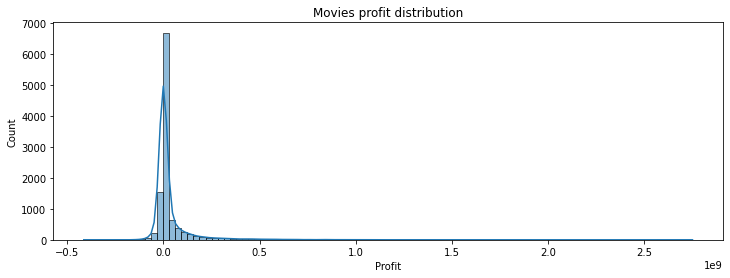

In [383]:
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.histplot(data=df, x='profit_adj', kde=True, bins=100)

ax.set_xlabel('Profit')
ax.set_title('Movies profit distribution')

plt.show()

As we can see, the distribution is skewed to the right because the majority of films made break even. We may take more information from analysing few more measures:

In [382]:
df['profit_adj'].describe()

count    1.072500e+04
mean     3.425737e+07
std      1.259749e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.386521e+07
max      2.750137e+09
Name: profit_adj, dtype: float64

Although the mean is pretty high (around 34 million dolars), the median is close to 0. This means that at least 50% of the movies listed did not bring any profit at all.

### What is the most popular movie?

We can base this calculation in a few different ways. For example, the movie with the most votes (as one vote would be one view) would be the most viewed in the list:

In [223]:
df.sort_values('vote_count', ascending=False)[['original_title' , 'release_year', 'vote_count', 'vote_average']].head()

,original_title,release_year,vote_count,vote_average
1919,Inception,2010,9767,7.9
4361,The Avengers,2012,8903,7.3
1386,Avatar,2009,8458,7.1
2875,The Dark Knight,2008,8432,8.1
4364,Django Unchained,2012,7375,7.7


As we see, the most popular movie, measured in count votes is **Inception**, followed by _The Avengers_ and _Avatar_.

However, in terms of popularity, it seems that _Inception_ is not the most popular one. The first place is taken by **Jurassic World**, followed by _Mad Max: Fury Road_. Both of them are related to old movies. This may lead us to another insight: remakes of older sagas may reach higher levels of popularity.

In [225]:
df.sort_values('popularity', ascending=False)[['original_title' , 'release_year', 'vote_count', 'vote_average', 'popularity']].head()

,original_title,release_year,vote_count,vote_average,popularity
0,Jurassic World,2015,5562,6.5,32.985763
1,Mad Max: Fury Road,2015,6185,7.1,28.419936
629,Interstellar,2014,6498,8.0,24.949134
630,Guardians of the Galaxy,2014,5612,7.9,14.311205
2,Insurgent,2015,2480,6.3,13.112507


### Are more popular movies more profitable?

In order to calculate this, we can scatter plots. In the X axis, we will scatter the popularity while the profit will be in the Y axis. As we can see in the graph below, there is not a strong correlation between both. This means that more popular movie does not mean it is more profitable.

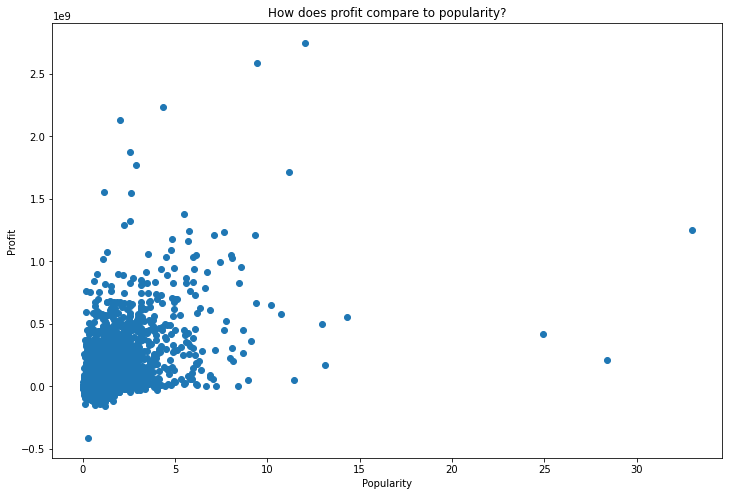

In [348]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(df["popularity"], df["profit_adj"])


plt.xlabel("Popularity")
plt.ylabel("Profit")
plt.title("How does profit compare to popularity?")

plt.show()

As we can see in the graph below, there is not any correlation between revenue and popularity as well.

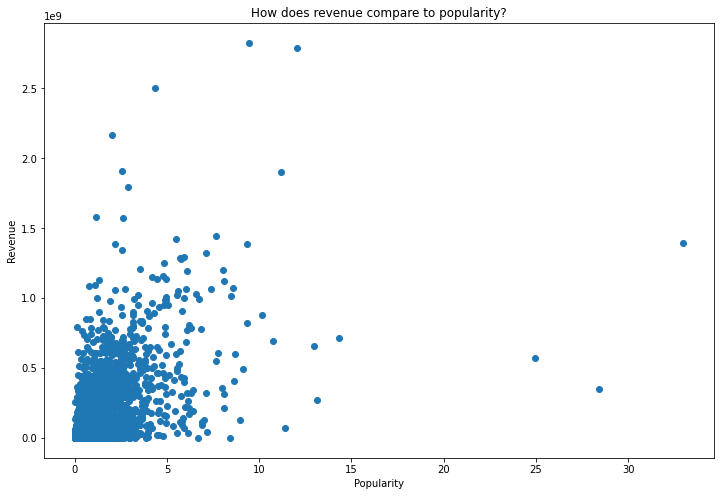

In [385]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(df["popularity"], df["revenue_adj"])


plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.title("How does revenue compare to popularity?")

plt.show()

### What is the average vote rate?

To answer this question, we can plot a histogram. As we can see, the value is going to be around 6.

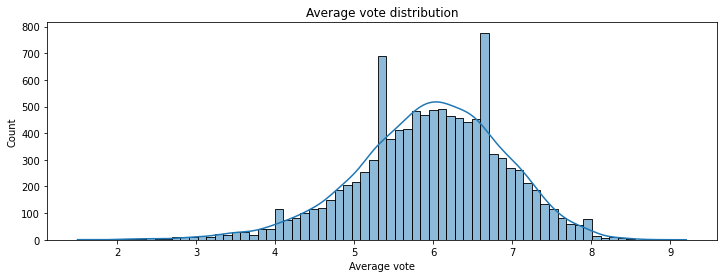

In [345]:
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.histplot(data=df, x='vote_average', kde=True)

ax.set_xlabel('Average vote')
ax.set_title('Average vote distribution')

plt.show()

By doing the mean and the median of the variable, we can get more precisse data:

In [346]:
df['vote_average'].describe()

count    10725.000000
mean         5.964317
std          0.930166
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

The mean would be around 5.96 while the median would be 6. This means that 50% of the values are below 6 and 50% above 6.

### How do rates relate to profit? And revenue?

We will scatter plots to see if there is any correlation. As we can see in the graph below, it seems that there is a positive correlation between the movies that have higher average votes and profit. This could mean that, when the public gives a movie a good rating, the probability of it being more profitable can be higher.

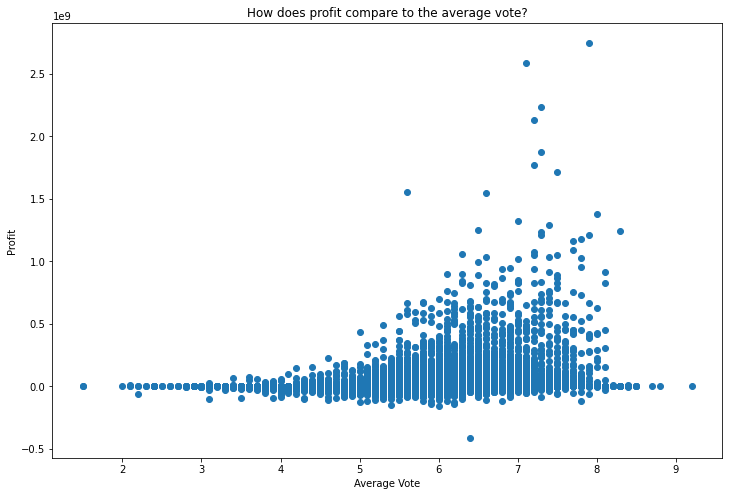

In [330]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(df["vote_average"], df["profit_adj"])


plt.xlabel("Average Vote")
plt.ylabel("Profit")
plt.title("How does profit compare to the average vote?")

plt.show()

When we compare the vote average with the revenue, the correlation is even stronger. We could say that the higher a movie gets rated, the higher the revenue is.

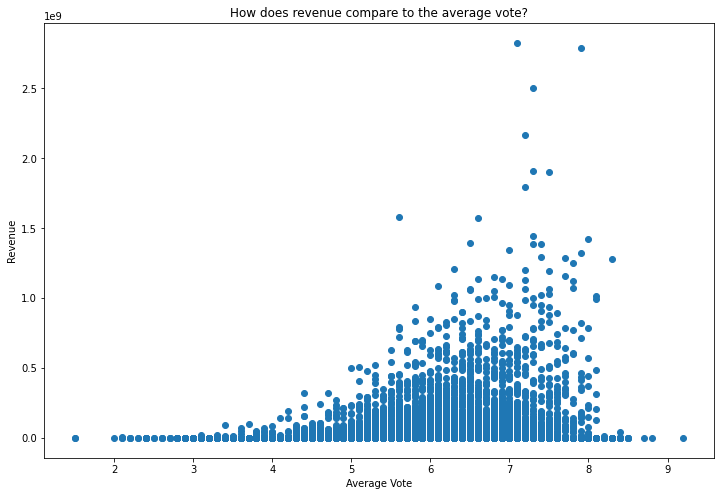

In [331]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(df["vote_average"], df["revenue_adj"])


plt.xlabel("Average Vote")
plt.ylabel("Revenue")
plt.title("How does revenue compare to the average vote?")

plt.show()

### Are recent movies better than old movies?

In order to answer this question, we need to define what is a new movie and and old movie. In order to get more consistent values, we will make the split at the percentile 50. This way, 50% of the movies will be old and 50% will be new.

In [302]:
df['release_year'].describe()

count    10725.000000
mean      2001.255012
std         12.822147
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

As we can see, the year 2006 is the one that separates 50% of the total values so, from 2006 (included) until 2015, we will consider it a new movie. From 1960 to 2006, we will consider an old movie.

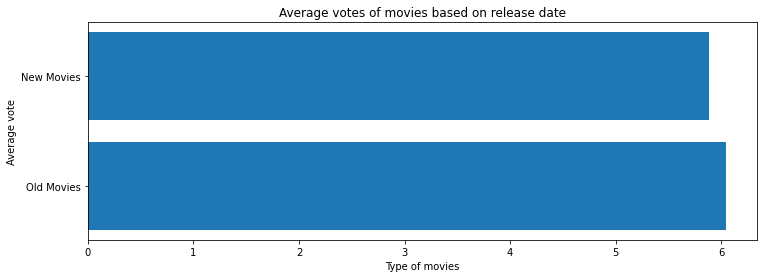

In [386]:
# Define old and new movies
old_movies = df[df['release_year'] < 2006]['vote_average'].mean()
new_movies = df[df['release_year'] >= 2006]['vote_average'].mean()

# Plot the graph
fig, ax = plt.subplots(figsize=(12,4))

ax.barh(["Old Movies", "New Movies"], [old_movies, new_movies])

ax.set_xlabel("Type of movies")
ax.set_ylabel("Average vote")
ax.set_title("Average votes of movies based on release date")

plt.show()

As we can see, old movies are voted slightly better than new movies. But the difference is not enough to affirm that old movies are better than new movies.

<a id='conclusions'></a>

## Conclusions


We may run down the conclusions obtained in the following:

*   The most popular genre for the whole dataset is drama. There are a few problems with this calculation because a lot of movies have more than one genre attached. This was not take into account when calculating.

*   This genre has been changing along the decades. From the 60's to the 80's, the most popular genre was drama. From the 80's to the 10's, comedy. From the 10's, drama again. Not only the genre has been changing during the years. Based on this dataset, a lot more movies are being done nowadays.
*   The movie with the highest budget is _Pirates of the Caribbean: On Stranger Tides_. However, it is not the most profitable.
*   The highest-grossing movie is _Avatar_. However, it is not the most profitable one. It is _Paranormal Activity_. The other top thre most profitable movies in history are horror movies as well. This genre looks profitable.
*   More popularity does not necessary imply more profit. At least 50% of the movies make little to no profit at all
*   The average vote is 5.94. However, a higher vote could imply more revenue or profit.
*   Old movies are better rated| than new movies.



### Limitations

Despite the conclusions obtained before may be right. We have incurred in a few different limitations:

1.  We have not used any inferential statistic to draw conclusions out of the population. We have just used the IMDb dataset. There may be errors that are not contemplated in the last analysis.
2.  The most popular genre conclusion is biased. This is because a lot of movies have different type of genres. For example, a movie with "Drama|Comedy|Action" as a genre does not count in "Drama" or "Comedy" or "Action". The results may vary if the analysis is done differently.